# 02 Paul

* dataset with trajectory

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from copy import deepcopy
from numpy import ma
from sklearn.decomposition import NMF, PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Model fitting

In [33]:
def fit_nmf(X, model = NMF(n_components=20, init='nndsvd', random_state=42, verbose=False)):
    fit_model = deepcopy(model)
    
    W = fit_model.fit_transform(X) # basis matrix
    H = fit_model.components_      # mixture matrix
       
    return fit_model, W, H

In [50]:
def tsne_embed(X, seed=42):
    return pd.DataFrame(TSNE(random_state=seed).fit_transform(X))

# Read data

In [2]:
paul_dir = '/media/tmo/data/work/datasets/paul/generate_clustering/scdb/umi.tab/'

In [18]:
%%time
dfs = [pd.read_csv(paul_dir + file, sep='\t') for file in os.listdir(paul_dir)]

CPU times: user 46.8 s, sys: 3.7 s, total: 50.5 s
Wall time: 50.6 s


In [19]:
paul_df = pd.concat(dfs, axis=1)

In [20]:
paul_df.shape

(27389, 16704)

In [22]:
paul_df.index.name='gene'

In [24]:
paul_df.head()

,W38017,W38018,W38019,W38020,W38021,W38022,W38023,W38024,W38025,W38026,...,W52519,W52520,W52521,W52522,W52523,W52524,W52525,W52526,W52527,W52528
gene,,,,,,,,,,,,,,,,,,,,,
0610007C21Rik;Apr3,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
0610007L01Rik,1,0,0,0,2,2,0,0,0,2,...,3,0,1,2,0,0,1,0,1,0
0610007P08Rik;Rad26l,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
0610007P22Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prep data

In [25]:
paul_m = paul_df.as_matrix()

In [29]:
scaler = StandardScaler(with_mean=False)

scaled_m = scaler.fit_transform(paul_m.T).T

/home/tmo/work/batiskav/installs/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
%%time
model, W, H = fit_nmf(scaled_m)

CPU times: user 15min 10s, sys: 1min 13s, total: 16min 23s
Wall time: 15min 12s


In [43]:
model.reconstruction_err_

15952.672823753688

In [40]:
%%time
tsne_df = tsne_embed(H.T)

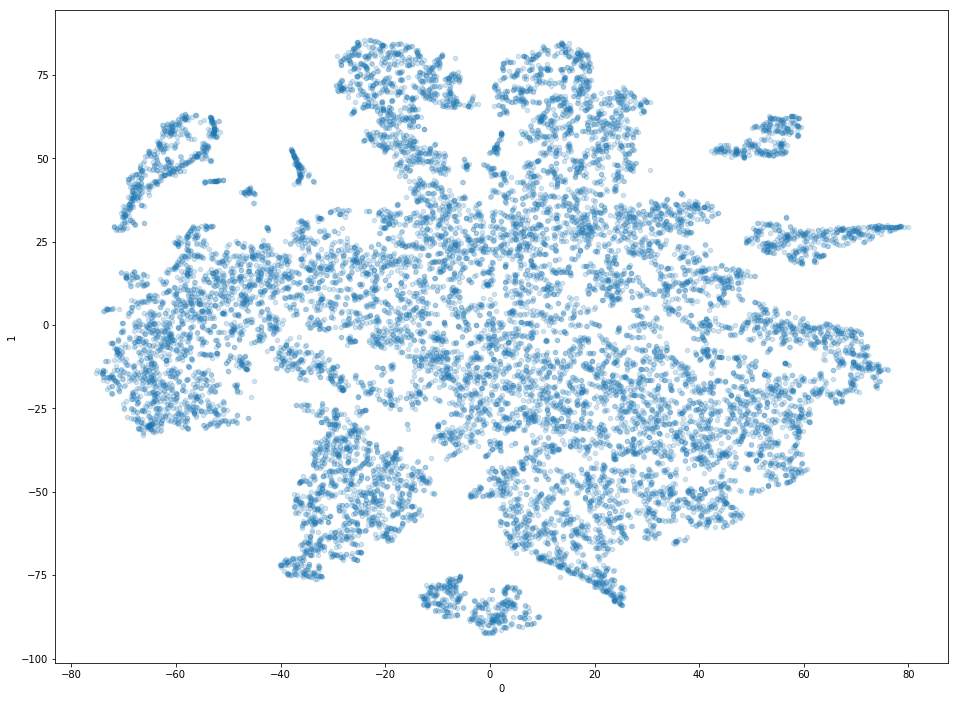

In [42]:
tsne_df.plot.scatter(x=0, y=1, figsize=(16,12), alpha=0.2)
plt.show()

In [51]:
%%time
tsne_df = tsne_embed(H.T)

CPU times: user 7min 24s, sys: 1min 11s, total: 8min 35s
Wall time: 8min 35s


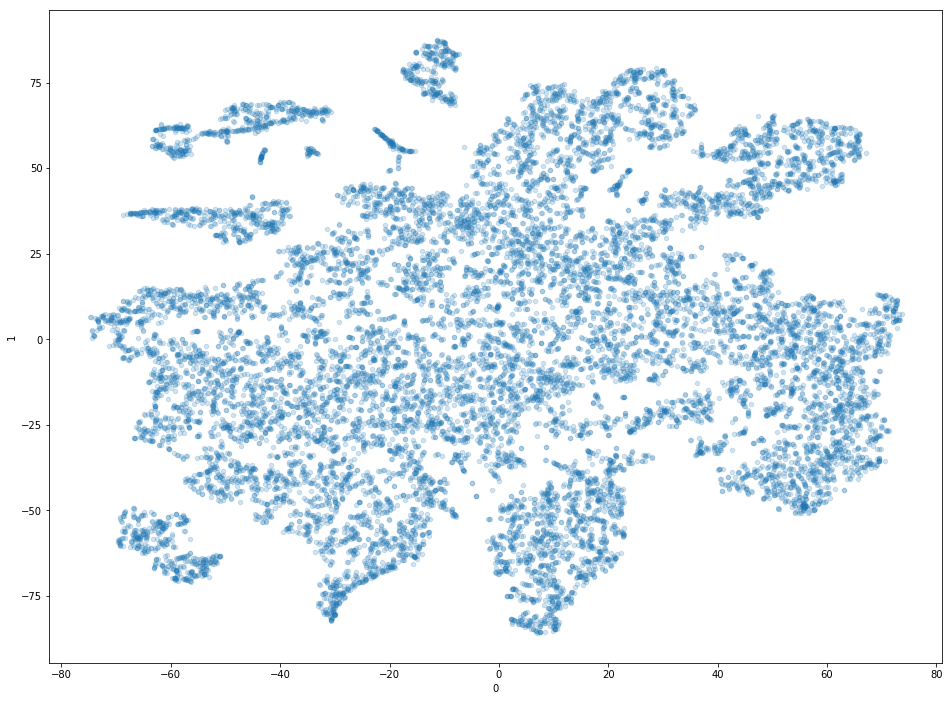

In [52]:
tsne_df.plot.scatter(x=0, y=1, figsize=(16,12), alpha=0.2)
plt.show()

# unscaled

In [46]:
%%time
model_u, W_u, H_u = fit_nmf(paul_m)

CPU times: user 15min 9s, sys: 1min 17s, total: 16min 27s
Wall time: 15min 16s


In [47]:
model_u.reconstruction_err_

7308.5665060220517

In [48]:
%%time
tsne_df_u = tsne_embed(H_u.T)

CPU times: user 6min 58s, sys: 1min 10s, total: 8min 8s
Wall time: 8min 8s


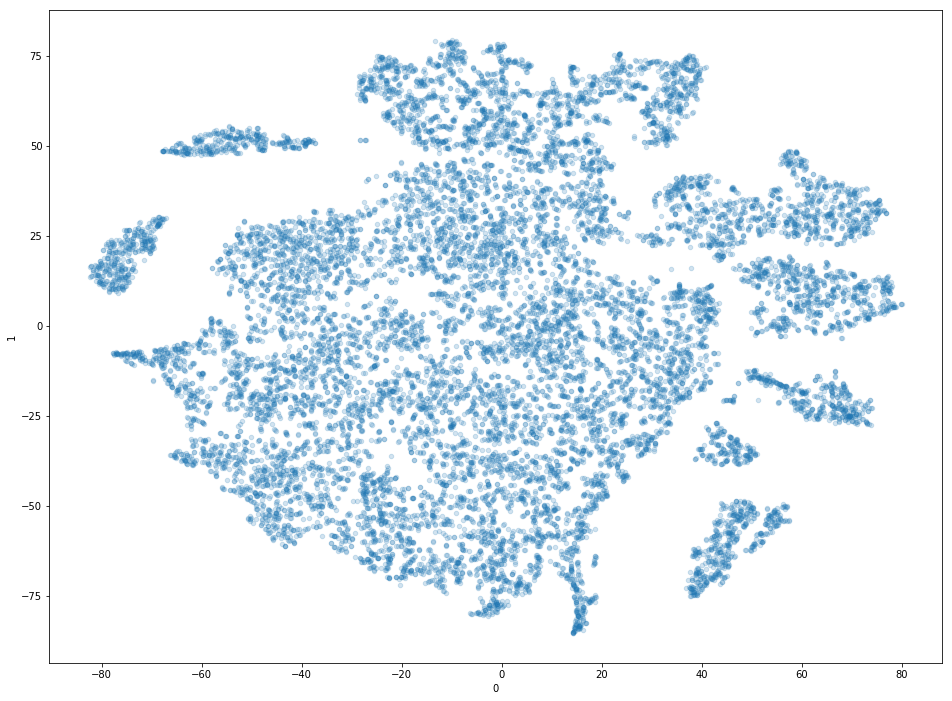

In [49]:
tsne_df_u.plot.scatter(x=0, y=1, figsize=(16,12), alpha=0.2)
plt.show()

# Pairwise distance

In [55]:
import sklearn.metrics.pairwise as pw

In [61]:
%%time
dist_m = pw.pairwise_distances(H_u.T, metric='euclidean', n_jobs=-1)

In [66]:
L_inf_dists = dist_m.max(axis=1)
L_inf_dists.sort()

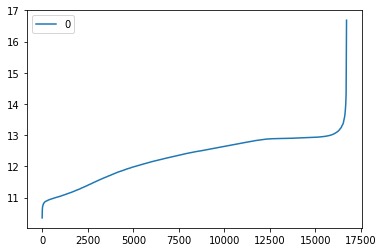

In [68]:
pd.DataFrame(L_inf_dists).plot()
plt.show()

In [69]:
%%time
dist_scaled_m = pw.pairwise_distances(H.T, metric='euclidean', n_jobs=-1)

CPU times: user 2.91 s, sys: 18.6 s, total: 21.5 s
Wall time: 25.2 s


In [70]:
L_inf_scaled_dists = dist_scaled_m.max(axis=1)
L_inf_scaled_dists.sort()

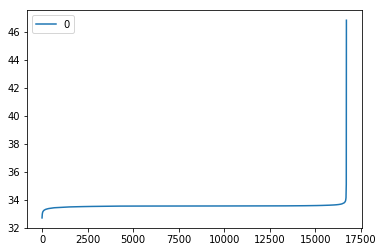

In [71]:
pd.DataFrame(L_inf_scaled_dists).plot()
plt.show()

In [77]:
merged_df = pd.concat([pd.DataFrame(L_inf_dists), pd.DataFrame(L_inf_scaled_dists)], axis=1)

In [79]:
merged_df.columns=['a', 'b']

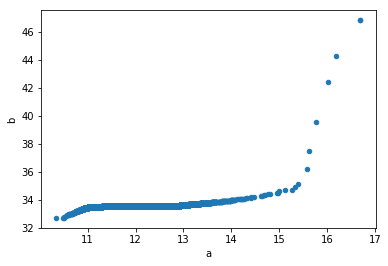

In [82]:
merged_df.plot.scatter(x='a', y='b')
plt.show()